#### <h1> <center> ENSF 519.01 Programming Fundamentals for Data Engineers </center></h1>
<h2> <center> Lab 9 (exercise): Introduction to Classification and Regression </center></h2>
<h3> <center> This Lab will not be graded.  </center></h3>




This assignemnt focuses on applying basic classfication and regression techniques in the context of sofware quality.

<h2>Part A. Defect Prediction</h2>
<br>

Software quality assurance (SQA) techniques (e.g., testing, code review, etc.) are among the major tasks in software development that try to eliminate software defects, as much as possible, prior to deployment. However, they are also expensive and time consuming. Therefore, it is very beneficial to narrow the scope of SQA to the parts of the software (e.g., files, classes, or even methods) that are defective. Obviously, before applying SQA, the defective parts are unknown, therefore, “software defect prediction” techniques try to use machine learning to predict which parts of the software (e.g., which files) are more likely to be defective. Thus the SQA effort can be proportionally allocated to them (more SQA resources for parts that are predicted to be defective). 

In Parts A and B you will apply two supervised machine learning techniques to a defect dataset from a software repository, which is belong to a NASA system. The dataset have collected a set of software related metrics from the history of the software, per module. They also recorded the existence of a defect per module. In other words, your feature set is the metrics array and the targets are the existence of defects. 

The goal is to build a model to predict the target based on the features from the historical data. 

To read more about the dataset and the features collected see:

NASA dataset:http://openscience.us/repo/defect/mccabehalsted/jm1.html


<h2>Binary Classification </h2>

First, you should read the NASA data that is given to you as a .csv file ( NasaData.csv ). Use pandas read_csv function for this.

After reading the data, build binary classification models with KNeighborsClassifier, from SKLearn. The model gets metrics as feature set and predicts either a defective (1) or not defective (0) label.

Take 75% of data as training set and 25% of it as test set. To eliminate the randomness when splitting the data, you should run each classification technique 30 times with seeds from [1 to 30]. 

Using model_selection's train_test_split function, randomly select 1/4 of your dataset as training and 3/4 as testset. 
Calculate accuracies per technique and repeat this for a total of 30 random runs (every run will use a different random seed in train_test_split and return a separate accuracy value per model).

Visualize the distribution of the accuracies for each model in a single box plot, where The X_axis is the  classification technique that you've applied and the Y_axis is the accuracies.


*** Note1 you must use pandas for both reading from CSV and visualizing boxplots ***
<br>



(0, 1)

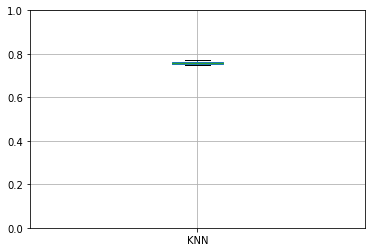

In [2]:
## Part A.1. Solution

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

def CSV_Reader(Filename):
  data_target=pd.read_csv(Filename)
  return [data_target.iloc[:,:-1],data_target.iloc[:,-1]]


features,lables=CSV_Reader("NasaData.csv")

KNN_Scores=[]
for i in range(1,31):
    
    X_train, X_test, y_train, y_test = train_test_split(
    features, lables,test_size=0.25,random_state=i)
   
    KNN = KNeighborsClassifier().fit(X_train, y_train)
    
    KNN_Scores.append(KNN.score(X_test, y_test))

axis=pd.DataFrame({"KNN":KNN_Scores}).boxplot(return_type="axes")
axis.set_ylim([0,1])



<h2>Part B. KNN complexity tuning </h2>
In this part, we want to tune the value k in kNN for our NASA dataset. To do so, you should find a sweet spot that the model is neither overfitted nor underfitted. 
Here again take the NASA dataset and apply the model_selection's train_test_split with 75% training and 25% test data, but with a fix random_state=42.  

Then build a K-Nearest-Neighbors model using k=1,3,5,..,49. Finally, plot the accuracy of your models on the training dataset and the testing dataset, using two lines in one plot.  

Using this plot identify what the best value is for k.

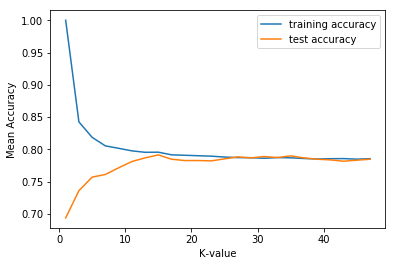

In [2]:
## Part B.1. Solution

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

def PlotDrawer(Plot_one,Plot_Two,X_axis):
    plt.plot(X_axis,Plot_one,label="training accuracy")
    plt.plot(X_axis,Plot_Two,label="test accuracy")
    plt.ylabel('Mean Accuracy')
    plt.xlabel('K-value')
    plt.legend()
    #plt.ylim(ymin=0)
    plt.show()

features,lables=CSV_Reader("NasaData.csv")

X_train, X_test, y_train, y_test = train_test_split(
    features, lables,test_size=0.25,random_state=42)

TrainingAcurracy=[]
TestingAcurracy=[]
DifferentK=[i*2-1 for i in range(1,25)]
for K in DifferentK:
    KNN = KNeighborsClassifier(n_neighbors=K).fit(X_train, y_train)
    TrainingAcurracy.append(KNN.score(X_train, y_train))
    TestingAcurracy.append(KNN.score(X_test, y_test))

PlotDrawer(TrainingAcurracy,TestingAcurracy,DifferentK)


<h1>Part C. Regression </h1>


In this section, we will use a new data set which is related to the performance of several CPUs. These CPUs are of different specifications, and you have the estimated relative performance(ERP) metric per CPU, in this data set.

columns of data set are as follows:

    MYCT: machine cycle time in nanoseconds (integer) 
    MMIN: minimum main memory in kilobytes (integer) 
    MMAX: maximum main memory in kilobytes (integer) 
    CACH: cache memory in kilobytes (integer) 
    CHMIN: minimum channels in units (integer) 
    CHMAX: maximum channels in units (integer) 
    PRP: published relative performance (integer) 
    ERP: estimated relative performance from the original article (integer)



Read the data that is given to you as a CSV file ("CPU_Performance.csv") and take 75% of it as training set and 25% of it as test set with random_state=42. 

Use default KNeighborsRegressor, to predict ERP using the other columns as features. 

To see how good you can predict on new CPUs performance, print the score of the model on training set and test set data. 

Use the default setup for the models.


In [3]:
## Part D.1. Solution
import csv
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

features,lables=CSV_Reader("CPU_Performance.csv")

X_train, X_test, y_train, y_test = train_test_split(
    features, lables,test_size=0.25,random_state=42)


kr = KNeighborsRegressor().fit(X_train, y_train)
print("*"*4," Linear Regression Prediction Result ","*"*4)
print("\tTraining set score: {:.3f}".format(kr.score(X_train, y_train)))
print("\tTest set score: {:.3f}\n".format(kr.score(X_test, y_test)))

****  Linear Regression Prediction Result  ****
	Training set score: 0.888
	Test set score: 0.607

